C:\Users\Samantha\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


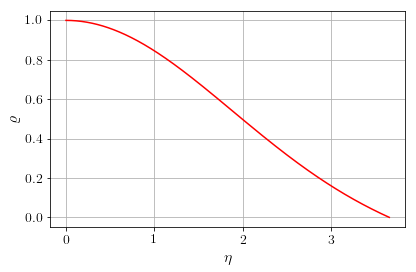

2.71405511518


In [49]:
import numpy as np
#import phy4910
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import simps
#from matplotlib import rc
#rc('text', usetex=True)
#matplotlib.rcParams['mathtext.fontset'] = 'cm'
#matplotlib.rcParams['font.family'] = 'STIXGeneral'
#plt.rcParams.update({'font.size':14})
#plt.rc('axes', labelsize=16)
#plt.rcParams.update({'figure.autolayout': True})

def ode_euler(x_start, x_end, h, y0, z0, f, g):
    
    x = np.arange(x_start, x_end, h)
    N = len(x)
    y = np.zeros(N)
    y[0] = y0
    z = np.zeros(N)
    z[0] = z0
    
    for i in range(0, N-1):
        k1 = h * f(x[i], y[i], z[i])
        l1 = h * g(x[i], y[i], z[i])
            
        y[i+1] = y[i] + k1
        z[i+1] = z[i] + l1
                
    return x, y, z

def ode_rk4(x_start, x_end, h, y0, z0, f, g):
    
    x = np.arange(x_start, x_end, h)
    N = len(x)
    y= np.zeros(N)
    y[0] = y0
    z = np.zeros(N)
    z[0] = z0
    
    for i in range(0, N-1):
        k1 = h * f(x[i], y[i], z[i])
        l1 = h * g(x[i], y[i], z[i])
        k2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k1, z[i] + 0.5 * l1)
        l2 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * k1, z[i] + 0.5 * l1)
        k3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k2, z[i] + 0.5 * l2)
        l3 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * k2, z[i] + 0.5 * l2)
        k4 = h * f(x[i] + h, y[i] + k3, z[i] + l3)
        l4 = h * g(x[i] + h, y[i] + k3, z[i] + l3)
    
        y[i+1] = y[i] + (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0
        z[i+1] = z[i] + (l1 + 2.0 * l2 + 2.0 * l3 + l4) / 6.0
        
    return x, y, z


n = 1.5

def f(x, y, z):
    return z;
    
def g(x, y, z):
    return -2.0 / x * z - np.power(y, n)

#eta1, rho1, tmp = phy4910.ode_euler(0.00001, 10, 0.3, 1.0, 0.0, f, g)

#eta2, rho2, tmp = phy4910.ode_rk4(0.00001, 10, 0.3, 1.0, 0.0, f, g)

#eta1, rho1, tmp = ode_euler(0.00001, 10, 0.3, 1.0, 0.0, f, g)

eta2, rho2, tmp = ode_rk4(0.00001, 3.654, 0.001, 1.0, 0.0, f, g)
#print(eta2, rho2)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1,1,1)
ax.grid(True)

#ax.plot(eta1, rho1, color="black")
ax.plot(eta2, rho2, color="red")
plt.ylabel(r'$\varrho$')
plt.xlabel(r'$\eta$')
#ax.plot(eta1, np.sin(eta1)/eta1, color="blue", linewidth=0.7)
#ax.plot(eta2, rho2-rho1, color="red")


plt.show()

#Section A, Part 1 - finding dimensionless mass
d_mass = simps((rho2**n)*(eta2**2.0), x)
print(d_mass)




C:\Users\Samantha\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


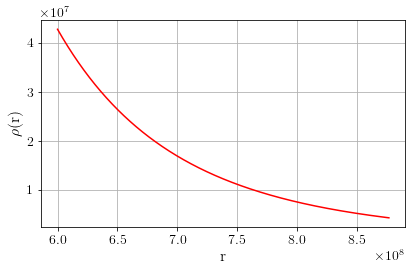

In [134]:
r0 = 6.0e8
rs = 8.767e8
dr = 10000

x = np.arange(r0,rs,dr)
N = len(x)
y = np.zeros(N)
y[0] = 0

for i in range(0,N): 
    y[i] = ((x[i]/3.654)**(-6.0))*((2.5*3.166e20)/(4*np.pi*6.674))**3.0

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1,1,1)
ax.grid(True)

ax.plot(x,y, color="red")
plt.ylabel(r'$\rho$(r)')
plt.xlabel(r'r')



plt.show()

C:\Users\Samantha\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


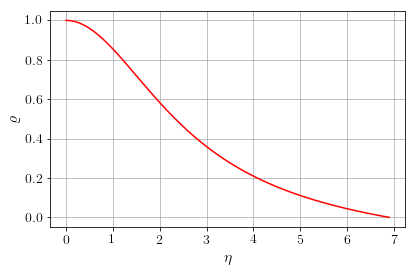

2.01823595262


In [52]:
n = 3

eta2, rho2, tmp = ode_rk4(0.00001, 6.898, 0.001, 1.0, 0.0, f, g)
#print(eta2, rho2)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1,1,1)
ax.grid(True)

ax.plot(eta2, rho2, color="red")
plt.ylabel(r'$\varrho$')
plt.xlabel(r'$\eta$')



plt.show()

#Section A, Part 1 - finding dimensionless mass
d_mass = simps((rho2**n)*(eta2**2.0), eta2)
print(d_mass)


C:\Users\Samantha\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


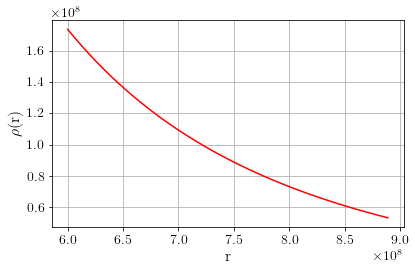

In [135]:
r0 = 6.0e8
rs = 8.890e8
dr = 10000

x = np.arange(r0,rs,dr)
N = len(x)
y = np.zeros(N)
y[0] = 0

for i in range(0,N): 
    y[i] = ((x[i]/6.898)*(4.936e22/(np.pi*6.674))**(-0.5))**(-3.0)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1,1,1)
ax.grid(True)

ax.plot(x,y, color="red")
plt.ylabel(r'$\rho$(r)')
plt.xlabel(r'r')



plt.show()

C:\Users\Samantha\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


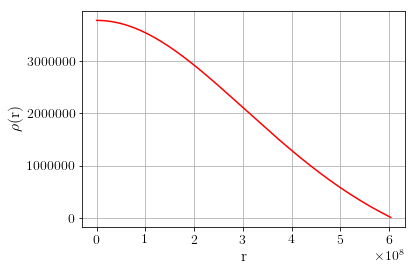

0.450006859297


In [222]:
def whitedwarf(x_start, x_end, h, y0, z0, f, g):
    
    x = np.arange(x_start, x_end, h)
    N = len(x)
    y= np.zeros(N)
    y[0] = y0
    z = np.zeros(N)
    z[0] = z0
    
    for i in range(0, N-1):
        if y[i] <= 0.001*y0:
            y[i+1] = y[i]
        k1 = h * f(x[i], y[i], z[i])
        l1 = h * g(x[i], y[i], z[i])
        k2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k1, z[i] + 0.5 * l1)
        l2 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * k1, z[i] + 0.5 * l1)
        k3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k2, z[i] + 0.5 * l2)
        l3 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * k2, z[i] + 0.5 * l2)
        k4 = h * f(x[i] + h, y[i] + k3, z[i] + l3)
        l4 = h * g(x[i] + h, y[i] + k3, z[i] + l3)
    
        y[i+1] = y[i] + (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0
        z[i+1] = z[i] + (l1 + 2.0 * l2 + 2.0 * l3 + l4) / 6.0
    
        
    return x, y, z


n = 1.5

def A(y):
    return -(5/9)*(y**(4/3))*((1+y**(2/3))**(-0.5))-(2/3)*(y**(2/3))*((1+y**(2/3))**(-1.5))+(1/3)*((1+y**(2/3))**(-2.5));

def B(y):
    return (5/3)*(y**(-1/3))*((1+y**(2/3))**(-0.5))-(1/3)*(y**(1/3))*((1+y**(2/3))**(-1.5));

def f(x, y, z):
    return z;
    
def g(x, y, z):
    return - (2/x)*z - (A(y)/B(y))*z**2.0 -(1/B(y))*y;

rho_c = 1.0

eta2, rho2, tmp = whitedwarf(0.00001, 3.890, 0.01, rho_c, 0.0, f, g)
mass = 4.0*np.pi*simps((rho2*(3.789e6)*(eta2*1.556e8)**2.0), (eta2*1.556e8))
S_mass = mass / (1.989e33)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1,1,1)
ax.grid(True)

ax.plot(eta2*(1.556e8), rho2*(3.789e6), color="red")
plt.ylabel(r'$\rho$(r)')
plt.xlabel(r'r')



plt.show()

mass = 4.0*np.pi*simps((rho2*(3.789e6)*(eta2*1.556e8)**2.0), (eta2*1.556e8))
S_mass = mass / (1.989e33)
print(S_mass)

C:\Users\Samantha\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Samantha\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Samantha\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Samantha\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Samantha\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in greater
C:\Users\Samantha\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater
C:\Users\Samantha\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Samantha\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure in

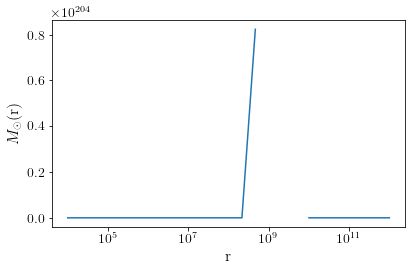

In [225]:
rho_c = np.logspace(4,12,25)



def model_WD(rho_c): 
    def whitedwarf(x_start, x_end, h, y0, z0, f, g):
    
        x = np.arange(x_start, x_end, h)
        N = len(x)
        y= np.zeros(N)
        y[0] = y0
        z = np.zeros(N)
        z[0] = z0
    
        for i in range(0, N-1):
            if y[i] <= 0.001*y0:
                break
            k1 = h * f(x[i], y[i], z[i])
            l1 = h * g(x[i], y[i], z[i])
            k2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k1, z[i] + 0.5 * l1)
            l2 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * k1, z[i] + 0.5 * l1)
            k3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k2, z[i] + 0.5 * l2)
            l3 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * k2, z[i] + 0.5 * l2)
            k4 = h * f(x[i] + h, y[i] + k3, z[i] + l3)
            l4 = h * g(x[i] + h, y[i] + k3, z[i] + l3)
    
            y[i+1] = y[i] + (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0
            z[i+1] = z[i] + (l1 + 2.0 * l2 + 2.0 * l3 + l4) / 6.0
    
        
        return x, y, z


    n = 1.5

    def A(y):
        return -(5/9)*(y**(4/3))*((1+y**(2/3))**(-0.5))-(2/3)*(y**(2/3))*((1+y**(2/3))**(-1.5))+(1/3)*((1+y**(2/3))**(-2.5));

    def B(y):
        return (5/3)*(y**(-1/3))*((1+y**(2/3))**(-0.5))-(1/3)*(y**(1/3))*((1+y**(2/3))**(-1.5));

    def f(x, y, z):
        return z;
    
    def g(x, y, z):
        return - (2/x)*z - (A(y)/B(y))*z**2.0 -(1/B(y))*y;

    eta2, rho2, tmp = whitedwarf(0.00001, 20, 0.01, rho_c/(3.789e6), 0.0, f, g)
    eta2 = eta2[rho2>0]
    rho2 = rho2[rho2>0]
    mass = 4.0*np.pi*simps((rho2*(3.789e6)*(eta2*1.556e8)**2.0), (eta2*1.556e8))
    S_mass = mass / (1.989e33)
    
    return S_mass;

M = np.zeros(25)
for i in range(25):
    M[i] = model_WD(rho_c[i])

plt.semilogx(rho_c,M)
ax = fig.add_subplot(1,1,1)
ax.grid(True)

ax.plot(eta2*(1.556e8), rho2*(3.789e6), color="red")
plt.ylabel(r'$M_\odot$(r)')
plt.xlabel(r'r')



plt.show()
#print(model_WD(1.0e8))
